# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv("../../data/raw/sba_national.csv", low_memory=False)
print(df.shape)
df.sample(3)

(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
353098,3459383005,"NORBCO, INC.",WESTMORELAND,NY,13490,HSBC BK USA NATL ASSOC,NY,0,13-Jun-89,1989,...,N,N,NaN,31-Jul-89,"$80,000.00",$0.00,P I F,$0.00,"$80,000.00","$72,000.00"
600015,5952484010,JUST PAINT,TONAWANDA,NY,14150,FIRST NIAGARA BANK NATL ASSOC,NY,235210,17-Dec-02,2003,...,0,Y,10-Aug-06,31-Mar-03,"$97,000.00",$0.00,CHGOFF,"$81,162.00","$97,000.00","$82,450.00"
384476,3705524002,F RICARDO MORENO DDS,AUSTIN,TX,78741,COMPASS BANK,AL,621210,21-Apr-00,2000,...,0,N,NaN,30-Jun-00,"$272,200.00",$0.00,P I F,$0.00,"$272,200.00","$204,150.00"


## Data Validation

In [5]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

### LoanNr_ChkDgt, Name, City, Zip, Bank, ApprovalFY, FranchiseCode, ChgOffDate, DisbursementDate, BalanceGross, & ChgOffPrinGr

In [6]:
drop_cols = ["LoanNr_ChkDgt",       # tiene 100% de valores distintos
             "Name",                # tiene 86.7% de valores distintos
             "City",                # cuenta con 32581 ciudades diferentes
             "Zip",                 # cuenta con 33611 codigos postales diferentes
             "Bank",                # cuenta con 5802 bancos diferentes
             "ApprovalFY",          # comportamiento similar a ApprovalDate
             "FranchiseCode",       # tiene 94.2% de codigos sin franquicia
             "ChgOffDate",          # fuga de informacion de la variable objetivo
             "DisbursementDate",    # comportamiento similar a ApprovalDate
             "BalanceGross",        # tiene practicamente 100% de valores en cero
             "ChgOffPrinGr"]        # fuga de informacion de la variable objetivo

In [7]:
df.drop(drop_cols, axis=1, inplace=True)
df.shape

(899164, 16)

### State, BankState, Term, NoEmp, CreateJob, RetainedJob & UrbanRural

In [8]:
df["State"].unique()

array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC', nan], dtype=object)

In [9]:
df["BankState"].unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', nan,
       'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN',
       'EN', 'VI'], dtype=object)

In [10]:
df["Term"].value_counts()

Term
84     230162
60      89945
240     85982
120     77654
300     44727
        ...  
438         1
382         1
367         1
374         1
429         1
Name: count, Length: 412, dtype: int64

In [11]:
df["NoEmp"].value_counts()

NoEmp
1       154254
2       138297
3        90674
4        73644
5        60319
         ...  
414          1
604          1
1280         1
3089         1
3713         1
Name: count, Length: 599, dtype: int64

In [12]:
df["CreateJob"].value_counts()

CreateJob
0      629248
1       63174
2       57831
3       28806
4       20511
        ...  
171         1
146         1
214         1
179         1
860         1
Name: count, Length: 246, dtype: int64

In [13]:
df["RetainedJob"].value_counts()

RetainedJob
0      440403
1       88790
2       76851
3       49963
4       39666
        ...  
191         1
247         1
226         1
675         1
198         1
Name: count, Length: 358, dtype: int64

In [14]:
df["UrbanRural"].value_counts()

UrbanRural
1    470654
0    323167
2    105343
Name: count, dtype: int64

### ApprovalDate, DisbursementGross, GrAppv & SBA_Appv

In [15]:
# ApprovalDate: formateamos la fecha porque el año tiene dos digitos
def format_date(app_date):
    date = app_date.split("-")
    year = date[2]
    if int(year) > 14: year = "19" + year
    else: year = "20" + year
    return f"{date[0]}-{date[1]}-{year}"

df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"].apply(format_date))

In [16]:
# DisbursementGross: formateamos la variable de currency a entero
df["DisbursementGross"] = df["DisbursementGross"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["DisbursementGross"] = df["DisbursementGross"].round().astype(int)
df["DisbursementGross"].value_counts()

DisbursementGross
50000      43787
100000     36714
25000      27387
150000     23373
10000      21328
           ...  
143118         1
23827          1
157338         1
60698          1
1086300        1
Name: count, Length: 118859, dtype: int64

In [17]:
# GrAppv: formateamos la variable de currency a entero
df["GrAppv"] = df["GrAppv"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["GrAppv"] = df["GrAppv"].round().astype(int)
df["GrAppv"].value_counts()

GrAppv
50000      69394
25000      51258
100000     50977
10000      38366
150000     27624
           ...  
407542         1
220900         1
57587          1
531577         1
1086300        1
Name: count, Length: 22128, dtype: int64

In [18]:
# SBA_Appv: formateamos la variable de currency a entero
df["SBA_Appv"] = df["SBA_Appv"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["SBA_Appv"] = df["SBA_Appv"].round().astype(int)
df["SBA_Appv"].value_counts()

SBA_Appv
25000     49579
12500     40147
5000      31135
50000     25047
10000     17009
          ...  
192949        1
212352        1
57072         1
32938         1
715674        1
Name: count, Length: 38326, dtype: int64

### NAICS, NewExist, RevLineCr & LowDoc

In [19]:
# NAICS: asignamos a NAICS el nombre del sector correspondiente
sector = {"11":"Agriculture, forestry, fishing and hunting",
          "21":"Mining, quarrying, and oil and gas extraction",
          "22":"Utilities",
          "23":"Construction",
          "31":"Manufacturing",
          "32":"Manufacturing",
          "33":"Manufacturing",
          "42":"Wholesale trade",
          "44":"Retail trade",
          "45":"Retail trade",
          "48":"Transportation and warehousing",
          "49":"Transportation and warehousing",
          "51":"Information",
          "52":"Finance and insurance",
          "53":"Real estate and rental and leasing",
          "54":"Professional, scientific, and technical services",
          "55":"Management of companies and enterprises",
          "56":"Administrative and support and waste management and remediation services",
          "61":"Educational services",
          "62":"Health care and social assistance",
          "71":"Arts, entertainment, and recreation",
          "72":"Accommodation and food services",
          "81":"Other services (except public administration)",
          "92":"Public administration",
          "0":"[Unallocated sector]"} # creamos la categoria "sector no asignado"}

df["NAICS"] = df["NAICS"].astype(str).str[0:2]
df["NAICS"] = df["NAICS"].apply(lambda x: sector[x])
df["NAICS"].value_counts()

NAICS
[Unallocated sector]                                                        201948
Retail trade                                                                127251
Other services (except public administration)                                72618
Professional, scientific, and technical services                             68170
Manufacturing                                                                68029
Accommodation and food services                                              67600
Construction                                                                 66646
Health care and social assistance                                            55366
Wholesale trade                                                              48743
Administrative and support and waste management and remediation services     32685
Transportation and warehousing                                               22531
Arts, entertainment, and recreation                                          1464

In [20]:
# NewExist: convertimos a NaN los valores no definidos
df["NewExist"] = np.where(df["NewExist"]==0.0, np.nan, df["NewExist"])
df["NewExist"] = df["NewExist"].astype("Int64")
df["NewExist"].value_counts()

NewExist
1    644869
2    253125
Name: count, dtype: Int64

In [21]:
# RevLineCr: convertimos a enteros los valores definidos y a NaN los demas
# asumiremos que T (true) y 1 podrian ser Y (yes), y 0 podria ser N (no)
df["RevLineCr"] = np.where(df["RevLineCr"].isin(["Y","T"]), "1", df["RevLineCr"])
df["RevLineCr"] = np.where(df["RevLineCr"].isin(["N"]), "0", df["RevLineCr"])
df["RevLineCr"] = np.where(~df["RevLineCr"].isin(["1","0"]), np.nan, df["RevLineCr"])
df["RevLineCr"] = df["RevLineCr"].astype("Int64")
df["RevLineCr"].value_counts()

RevLineCr
0    677890
1    216704
Name: count, dtype: Int64

In [22]:
# LowDoc: convertimos a enteros los valores definidos y a NaN los demas
# asumiremos que 1 podria ser Y (yes), y que 0 podria ser N (no)
df["LowDoc"] = np.where(df["LowDoc"]=="Y", "1", df["LowDoc"])
df["LowDoc"] = np.where(df["LowDoc"]=="N", "0", df["LowDoc"])
df["LowDoc"] = np.where(~df["LowDoc"].isin(["1","0"]), np.nan, df["LowDoc"])
df["LowDoc"] = df["LowDoc"].astype("Int64")
df["LowDoc"].value_counts()

LowDoc
0    784313
1    110336
Name: count, dtype: Int64

### MIS_Status

In [23]:
# MIS_Status: convertimos los valores a enteros (1 = Default y 0 = Paid)
df["MIS_Status"] = np.where(df["MIS_Status"]=="CHGOFF", 1, df["MIS_Status"])
df["MIS_Status"] = np.where(df["MIS_Status"]=="P I F", 0, df["MIS_Status"])
df["MIS_Status"] = df["MIS_Status"].astype("Int64")
df["MIS_Status"].value_counts()

MIS_Status
0    739609
1    157558
Name: count, dtype: Int64

### Drop Duplicates

In [24]:
# adicionalmente se visualizan y eliminan las instancias duplicadas
print(df[df.duplicated].shape)
display(df[df.duplicated].sample(3))

df.drop_duplicates(inplace=True)

(430, 16)


,State,BankState,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
774558,CO,NM,Wholesale trade,1995-03-17,84,17,1,0,0,0,0,0,250000,0,250000,175000
417028,MO,MO,Manufacturing,1990-04-10,6,18,1,0,0,0,0,0,23147,0,23147,19675
308318,CA,CA,Transportation and warehousing,2008-01-11,12,145,1,124,145,2,1,0,1500,<NA>,1500,750


In [25]:
print(df.shape)
df.dtypes

(898734, 16)


State                        object
BankState                    object
NAICS                        object
ApprovalDate         datetime64[ns]
Term                          int64
NoEmp                         int64
NewExist                      Int64
CreateJob                     int64
RetainedJob                   int64
UrbanRural                    int64
RevLineCr                     Int64
LowDoc                        Int64
DisbursementGross             int32
MIS_Status                    Int64
GrAppv                        int32
SBA_Appv                      int32
dtype: object

## Missing Values

In [26]:
df.isnull().sum()

State                  14
BankState            1564
NAICS                   0
ApprovalDate            0
Term                    0
NoEmp                   0
NewExist             1169
CreateJob               0
RetainedJob             0
UrbanRural              0
RevLineCr            4568
LowDoc               4514
DisbursementGross       0
MIS_Status           1956
GrAppv                  0
SBA_Appv                0
dtype: int64

### Using FillNA and DropNA

In [27]:
# imputamos los valores faltantes con la moda de la variable
mode = df["State"].mode()[0]
df["State"] = df["State"].fillna(mode)

In [28]:
# eliminamos todas las instancias nulas de la variable objetivo
df.dropna(subset=["MIS_Status"], inplace=True)
df["MIS_Status"] = df["MIS_Status"].astype(int)
df.shape

(896778, 16)

### Univariant: Simple Imputer

In [29]:
# imputamos los valores faltantes con la moda de la variable
col_values = df[["BankState"]]
mode_imputer = SimpleImputer(strategy="most_frequent")
mode_imputer_fit = mode_imputer.fit(col_values)
df["BankState"] = mode_imputer_fit.transform(col_values)[:, 0]

### Multivariant: KNN Imputer

In [30]:
# aplicamos imputacion multivariante de faltantes con KNN Imputer
cols_fit = df[["NewExist", "Term", "NoEmp", "CreateJob", "RetainedJob",
               "UrbanRural", "DisbursementGross", "GrAppv", "SBA_Appv"]]
k = int(round(np.sqrt(df.shape[0]), 2))
knn_imputer = KNNImputer(n_neighbors=k)
knn_imputer_fit = knn_imputer.fit(cols_fit)

cols_imputed = knn_imputer_fit.transform(cols_fit)
df["NewExist"] = cols_imputed[:, 0]

df["NewExist"] = round(df["NewExist"]).astype(int)
df["NewExist"].value_counts()

NewExist
1    644256
2    252522
Name: count, dtype: int64

### Using Classification Models

In [31]:
# imputamos valores categoricos faltantes utilizando modelos de clasificacion
cols = ["RevLineCr", "LowDoc"]
for col in cols:
    df_ = df[[col, "Term", "NoEmp", "CreateJob", "RetainedJob",
              "UrbanRural", "DisbursementGross", "GrAppv", "SBA_Appv"]]

    df_train = df_.dropna(subset=[col])
    df_test = df_[df_[col].isnull()]

    X_train = df_train.drop(columns=[col])
    y_train = df_train[col]
    X_test = df_test.drop(columns=[col])

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    y_test = rf_classifier.predict(X_test)
    df.loc[df[col].isnull(), col] = y_test

    df[col] = df[col].astype(int)
    print(f"{col}:")
    print(f"{df[col].value_counts()}\n")

RevLineCr:
RevLineCr
0    680940
1    215838
Name: count, dtype: int64

LowDoc:
LowDoc
0    786554
1    110224
Name: count, dtype: int64



In [32]:
print(df.shape)
df.isnull().sum()

(896778, 16)


State                0
BankState            0
NAICS                0
ApprovalDate         0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
dtype: int64

## Outlier Detection

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896778 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              896778 non-null  object        
 1   BankState          896778 non-null  object        
 2   NAICS              896778 non-null  object        
 3   ApprovalDate       896778 non-null  datetime64[ns]
 4   Term               896778 non-null  int64         
 5   NoEmp              896778 non-null  int64         
 6   NewExist           896778 non-null  int32         
 7   CreateJob          896778 non-null  int64         
 8   RetainedJob        896778 non-null  int64         
 9   UrbanRural         896778 non-null  int64         
 10  RevLineCr          896778 non-null  int32         
 11  LowDoc             896778 non-null  int32         
 12  DisbursementGross  896778 non-null  int32         
 13  MIS_Status         896778 non-null  int32        

### Z-Score

In [34]:
# usamos la desviacion estandar y Z-score con umbral de 3 para detectar outliers
cols = ["Term", "NoEmp", "CreateJob", "RetainedJob",
        "DisbursementGross","GrAppv","SBA_Appv"]
for col in cols:
    media = df[col].mean()
    dest = df[col].std()
    umbral = 3

    z_scores = (df[col] - media) / dest
    # df = df[(z_scores.abs() <= umbral)]

    print(f"{col}:")
    print(f"Media: {round(media, 1)}")
    print(f"Desviacion: {round(dest, 1)}")
    # print(f"Limite Min: {round(media - (dest * umbral), 1)}")
    print(f"Limite Max: {round(media + (dest * umbral), 1)}")
    print(f"Outliers: {z_scores[z_scores > umbral].count()}\n")

# print(df.shape)

Term:
Media: 110.9
Desviacion: 78.9
Limite Max: 347.6
Outliers: 183

NoEmp:
Media: 11.4
Desviacion: 73.8
Limite Max: 232.8
Outliers: 1449

CreateJob:
Media: 8.4
Desviacion: 236.8
Limite Max: 718.9
Outliers: 676



RetainedJob:
Media: 10.8
Desviacion: 237.3
Limite Max: 722.6
Outliers: 674

DisbursementGross:
Media: 201627.2
Desviacion: 287822.9
Limite Max: 1065095.8
Outliers: 19260

GrAppv:
Media: 193085.0
Desviacion: 283448.4
Limite Max: 1043430.2
Outliers: 19605

SBA_Appv:
Media: 149800.1
Desviacion: 228571.8
Limite Max: 835515.6
Outliers: 18049



### Interquartile Range

In [35]:
# usamos el rango intercuartilico IQR multiplicado con 1.5 como factor de escala
cols = ["Term", "NoEmp", "CreateJob", "RetainedJob",
        "DisbursementGross","GrAppv","SBA_Appv"]
for col in cols:
    Q1 = df[col][df[col] > 0].quantile(0.25)
    Q3 = df[col][df[col] > 0].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 4.5 * IQR
    limite_superior = Q3 + 4.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]

    # df = df[(df["DisbursementGross"] >= limite_inferior) & (df["DisbursementGross"] <= limite_superior)]

    print(f"{col}:")
    print(f"Rango Intercuartilico: {round(IQR, 1)}")
    print(f"Limite Inferior: {round(limite_inferior, 1)}")
    print(f"Limite Superior: {round(limite_superior, 1)}")
    print(f"Outliers: {outliers}\n")

# print(df.shape)

Term:
Rango Intercuartilico: 60.0
Limite Inferior: -210.0
Limite Superior: 390.0
Outliers: 39

NoEmp:
Rango Intercuartilico: 8.0
Limite Inferior: -34.0
Limite Superior: 46.0
Outliers: 33305

CreateJob:
Rango Intercuartilico: 5.0
Limite Inferior: -20.5
Limite Superior: 29.5
Outliers: 9890

RetainedJob:
Rango Intercuartilico: 7.0
Limite Inferior: -29.5
Limite Superior: 40.5
Outliers: 14837

DisbursementGross:
Rango Intercuartilico: 196500.0
Limite Inferior: -841750.0
Limite Superior: 1123250.0
Outliers: 17023

GrAppv:
Rango Intercuartilico: 190000.0
Limite Inferior: -820000.0
Limite Superior: 1080000.0
Outliers: 18227

SBA_Appv:
Rango Intercuartilico: 153750.0
Limite Inferior: -670625.0
Limite Superior: 866875.0
Outliers: 16952



### Elliptic Envelope

In [36]:
# aplicamos el ajuste de una envolvente eliptica para datos multivariados
df_ = df[["GrAppv","SBA_Appv"]].copy()
# model_outlier = IsolationForest(contamination=0.01)
model_outlier = EllipticEnvelope(contamination=0.01)
model_outlier.fit(df_)

outliers = model_outlier.predict(df_)
df_["Outlier"] = np.where(outliers == -1, 1, 0)
df = df[df_["Outlier"] == 0]

out_count = df_[df_["Outlier"]==1].shape[0]
print(f"Outliers: {out_count}")
print(df.shape)

Outliers: 9363
(887415, 16)


In [37]:
print(df.shape)
df.sample(3)

(887415, 16)


,State,BankState,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
533517,MI,IL,[Unallocated sector],1992-10-22,12,16,1,0,0,0,0,0,140000,0,140000,119000
539964,NJ,IL,Retail trade,2002-03-21,36,2,1,2,2,1,1,0,20000,0,20000,10000
587474,WA,WA,Health care and social assistance,2002-10-21,120,5,2,0,0,1,0,0,307000,0,307000,230250


## Feature Engineering

### Create Features

In [38]:
# creamos una variable que define si State y BankState son similares
df["DifState"] = np.where(df["State"] != df["BankState"], 1, 0)

In [39]:
# cambiamos de nombre la variable NAICS a Sector que la describe mejor
df.rename(columns={"NAICS":"Sector"}, inplace=True)

In [40]:
# escalamos los valores de la variable NewExist a valores binarios
df["NewExist"] = np.where(df["NewExist"] == 2, 1, 0)

In [41]:
# calculamos si el prestamo esta garantizado con una propiedad inmobiliaria
df["Secured"] = np.where(df["Term"] >= 240, 1, 0)

In [42]:
# calculamos la fecha de vencimiento sumando Term a DisbursementDate
# df["ExpirationDate"] = df.apply(lambda x: x["DisbursementDate"]
#                                 + pd.DateOffset(months=x["Term"]), axis=1)

In [43]:
# creamos variables para el año y mes de la variable ApprovalDate
df["AppYear"] = df["ApprovalDate"].dt.year
df["AppMonth"] = df["ApprovalDate"].dt.month

In [44]:
# calculamos el porcentaje del monto de SBA_Appv aportado sobre GrAppv
df["SecuredSBA"] = round((df["SBA_Appv"] / df["GrAppv"]) * 100)
df["SecuredSBA"] = df["SecuredSBA"].astype(int)

In [45]:
# cambiamos de nombre algunas de las variables por una abreviacion
df.rename(columns={"NAICS":"Sector",
                   "RevLineCr":"RevLine",
                   "DisbursementGross":"GrDisburs",
                   "GrAppv":"GrApprov",
                   "SBA_Appv":"ApprovSBA",
                   "MIS_Status":"Default"}, inplace=True)

In [46]:
# ordenamos adecuadamente todas las variables actuales del dataset
df = df[["State","BankState","DifState","Sector","AppYear","AppMonth","Term",
         "Secured","NoEmp","NewExist","CreateJob","RetainedJob","UrbanRural",
         "RevLine","LowDoc","GrDisburs","GrApprov","ApprovSBA","SecuredSBA","Default"]]

In [47]:
print(df.shape)
df.sample(3)

(887415, 20)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
744102,TX,TX,0,[Unallocated sector],1994,11,60,0,62,0,0,0,0,0,1,45000,45000,40500,90,0
263002,WI,IL,1,[Unallocated sector],1987,1,53,0,16,1,0,0,0,0,0,275000,275000,233750,85,1
447854,TX,TX,0,Other services (except public administration),2001,3,84,0,12,0,0,0,1,0,0,65000,65000,48750,75,0


### Feature Analisys

In [48]:
# verificamos que todos los tipos de datos del dataset sean correctos
df.dtypes

State          object
BankState      object
DifState        int32
Sector         object
AppYear         int32
AppMonth        int32
Term            int64
Secured         int32
NoEmp           int64
NewExist        int32
CreateJob       int64
RetainedJob     int64
UrbanRural      int64
RevLine         int32
LowDoc          int32
GrDisburs       int32
GrApprov        int32
ApprovSBA       int32
SecuredSBA      int32
Default         int32
dtype: object

In [49]:
# separamos en listas las variables binarias, numericas y categoricas
bin_cols = ["DifState","Secured","NewExist",
            "RevLine","LowDoc","Default"]           # binarias

num_cols = ["Term","NoEmp","CreateJob",
            "RetainedJob","SecuredSBA",             # numericas discretas
            "GrDisburs","GrApprov","ApprovSBA"]     # numericas continuas

cat_cols = ["State","BankState","Sector",           # categoricas nominales
            "UrbanRural",                           # categoricas numericas
            "AppYear","AppMonth"]                   # categoricas ordinales

# _ = df.select_dtypes("int").columns.to_list()
print(f"Binary:    {bin_cols}")
print(f"Numeric:   {num_cols}")
print(f"Categoric: {cat_cols}")

Binary:    ['DifState', 'Secured', 'NewExist', 'RevLine', 'LowDoc', 'Default']
Numeric:   ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'SecuredSBA', 'GrDisburs', 'GrApprov', 'ApprovSBA']
Categoric: ['State', 'BankState', 'Sector', 'UrbanRural', 'AppYear', 'AppMonth']


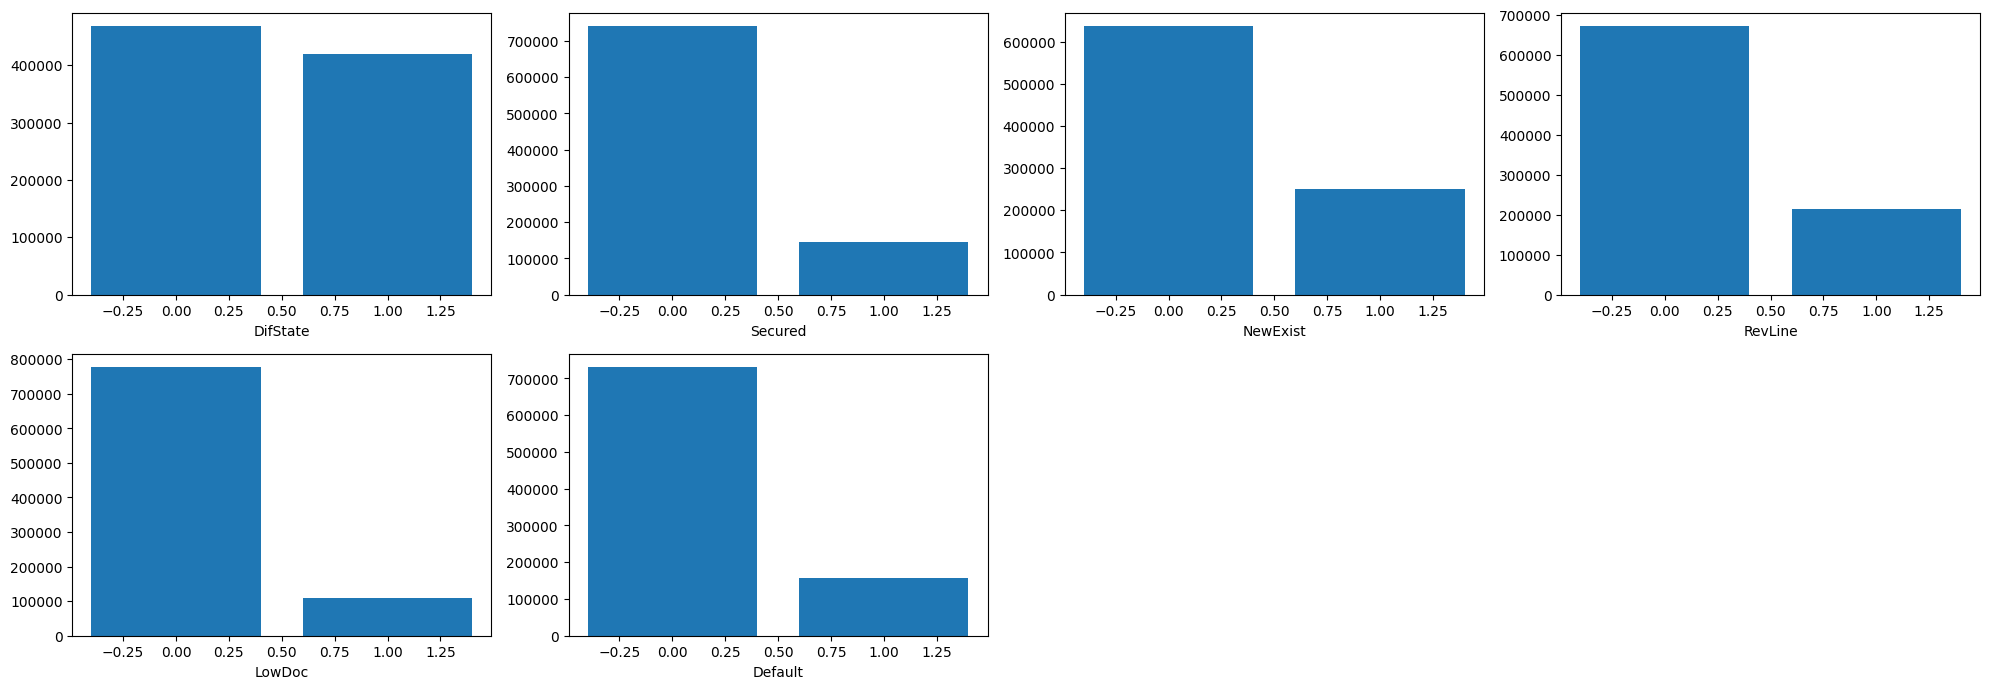

In [50]:
# graficamos la distribucion de los datos de las variables binarias
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(bin_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    plt.bar(df_[col], df_["count"])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

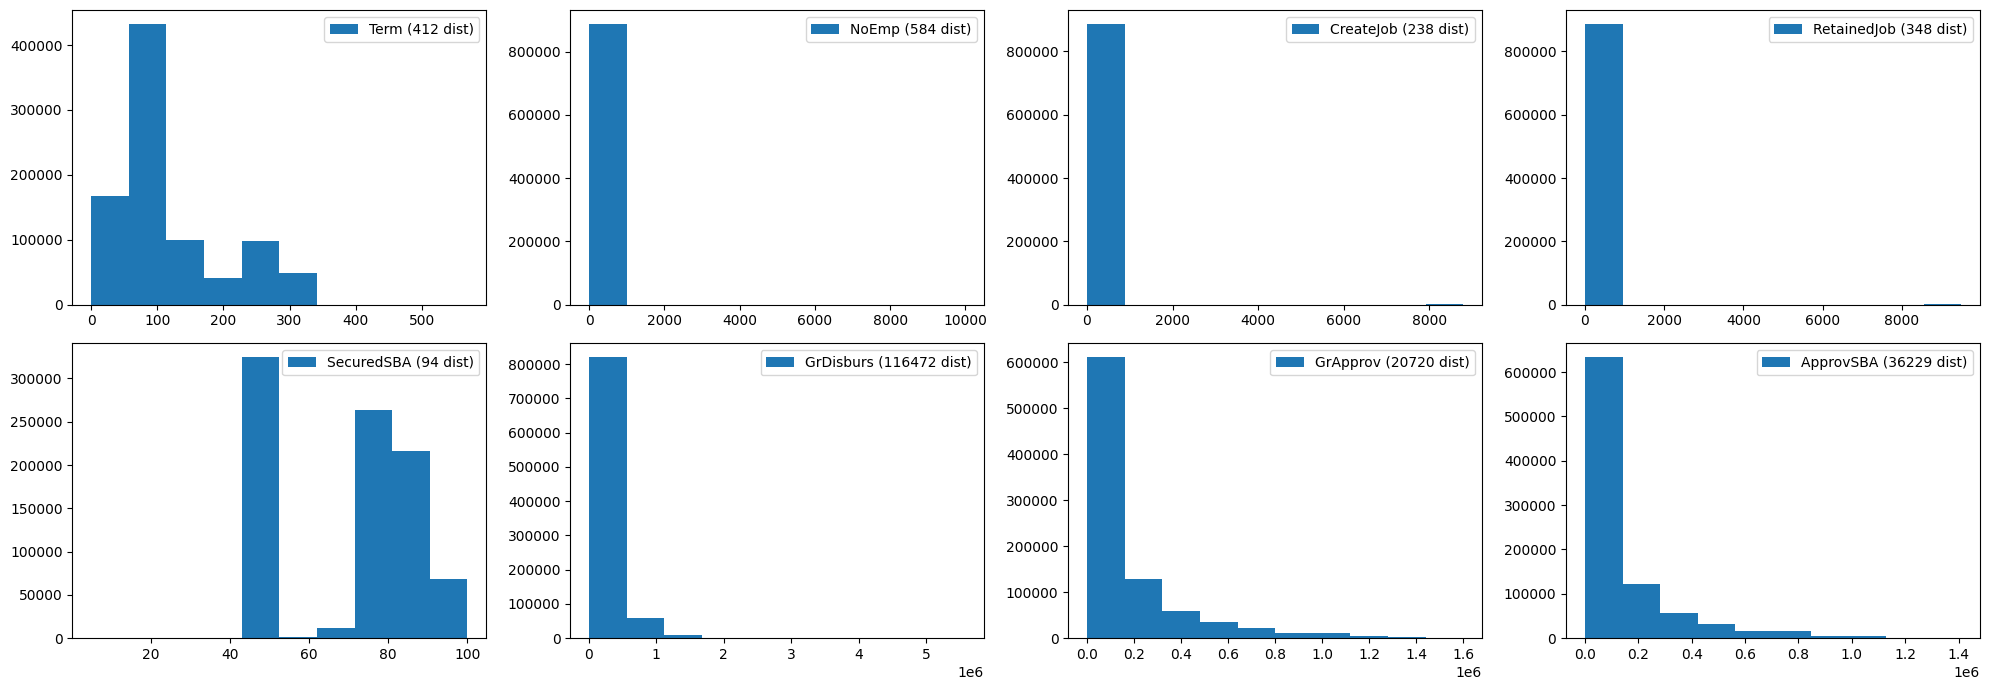

In [51]:
# graficamos la distribucion de los datos de las variables numericas
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    col_cls = col + " (" + str(df[col].value_counts().count()) + " dist)"
    plt.hist(df[col], label=col_cls)
    plt.legend()

plt.tight_layout()
plt.show()

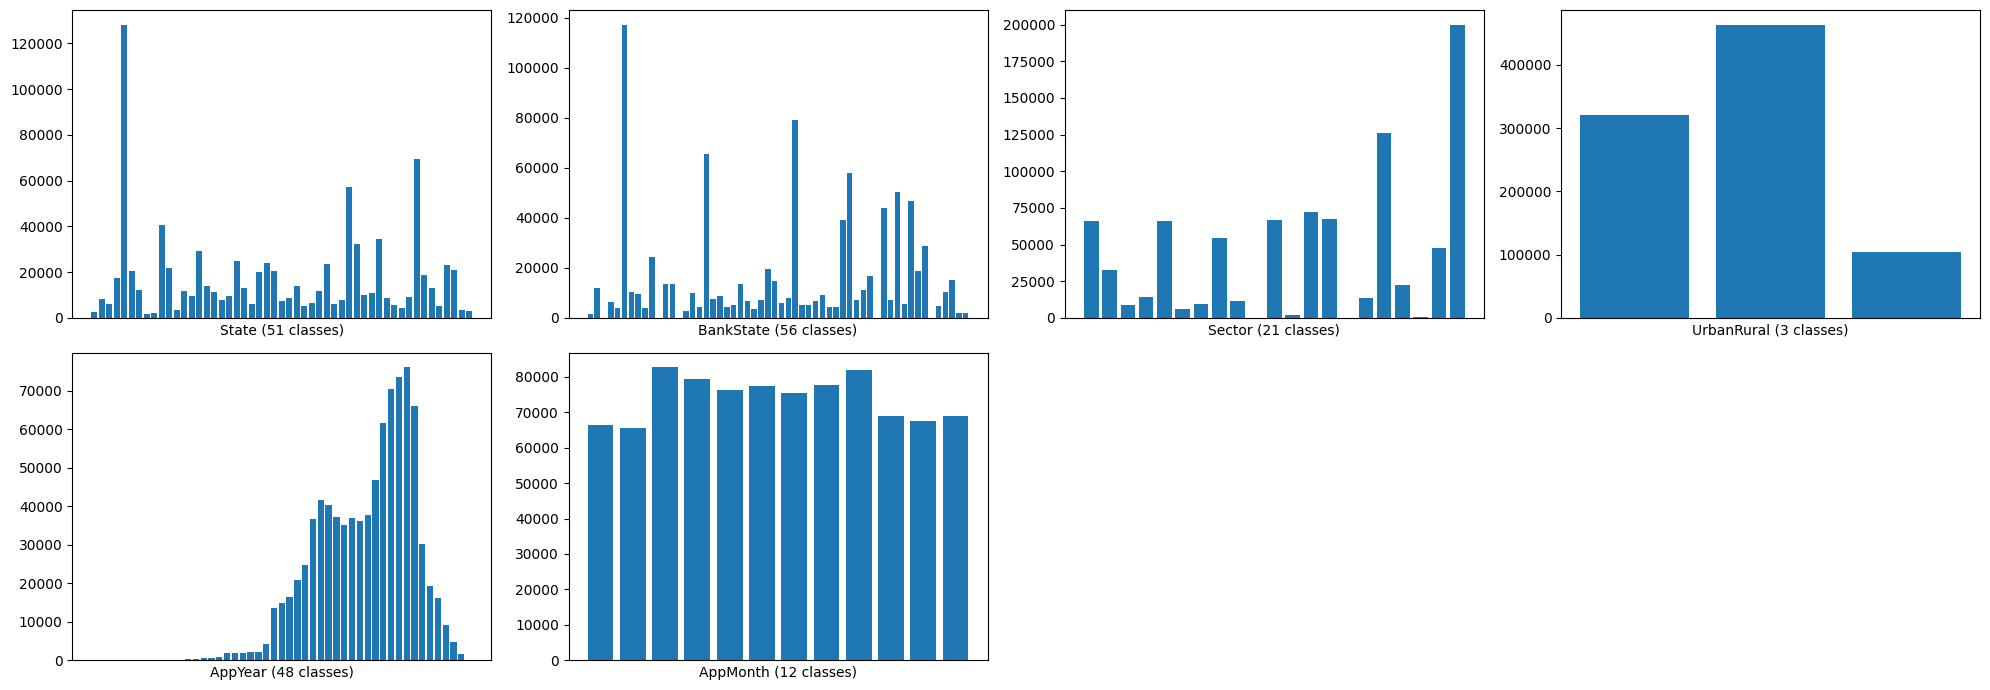

In [52]:
# graficamos la distribucion de los datos de las variables categoricas
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    plt.bar(df_[col], df_["count"])
    col_cls = col + " (" + str(df[col].value_counts().count()) + " classes)"
    plt.xlabel(col_cls)
    plt.xticks([])

plt.tight_layout()
plt.show()

### Standardization

La estandarizacion es util cuando los datos siguen una distribucion normal y queremos tener una media de 0 y una desviacion estandar de 1.

Estandarizar variables depende del modelo a utilizar, como algoritmos que utilizan descenso de gradiente en regresiones o redes neuronales.

Algunos algoritmos, como los arboles de decisión, no se ven afectados por la escala de las variables, por lo que no necesitan estandarizacion.

In [53]:
# aplicaremos estandarizacion solo a modo de ejemplo sobre un dataset clonado
df_ = df.copy()

scaler = StandardScaler()
df_[num_cols] = scaler.fit_transform(df_[num_cols])

media = round(df_["Term"].mean(), 1)
dest = round(df_["Term"].std(), 1)
print(f"Media Term: {media}")
print(f"Desviacion Term: {dest}")
df_[num_cols].sample(3)

Media Term: 0.0
Desviacion Term: 1.0


,Term,NoEmp,CreateJob,RetainedJob,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
893888,-0.189180,-0.111723,-0.035455,-0.045126,-0.633134,-0.363505,-0.332219,-0.408739
437457,-0.637377,0.011548,-0.035455,-0.045126,1.097994,-0.681557,-0.655468,-0.604279
712700,-0.330042,-0.056936,-0.035455,-0.015773,-1.210177,-0.575539,-0.547718,-0.591243


### Normalization

La normalizacion se refiere a escalar los valores de una variable para que esten en un rango especifico, generalmente entre 0 y 1.

Normalizar variables depende del modelo a utilizar, como algoritmos que utilizan medidas de distancia, como el K-NN o el K-Means.

Algunos algoritmos, como los arboles de decisión, no se ven afectados por la escala de las variables, por lo que no necesitan normalizacion.

In [54]:
# aplicaremos normalizacion solo a modo de ejemplo sobre un dataset clonado
df_ = df.copy()

normalizer = MinMaxScaler()
normalizer_fit = normalizer.fit(df_[num_cols])
df_[num_cols] = normalizer_fit.transform(df_[num_cols])

min = round(df_["Term"].min(), 1)
max = round(df_["Term"].max(), 1)
print(f"Min Term: {min}")
print(f"Max Term: {max}")
df_[num_cols].sample(3)

Min Term: 0.0
Max Term: 1.0


,Term,NoEmp,CreateJob,RetainedJob,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
787537,0.316344,0.0005,0.0,0.000000,0.894737,0.025554,0.090955,0.093165
4535,0.049209,0.0005,0.0,0.000000,0.473684,0.003769,0.015013,0.008517
667995,0.147627,0.0006,0.0,0.000632,0.473684,0.014502,0.018141,0.010292


### Encode Features

In [55]:
# Label Encoder: aplicamos a las variables categoricas nominales
label_encoder = LabelEncoder()
for col in cat_cols[:2]:
    df[col] = label_encoder.fit_transform(df[col])

sector_encoder = LabelEncoder()
sector_encoder_fit = sector_encoder.fit(df["Sector"])
df["Sector"] = sector_encoder_fit.transform(df["Sector"])

print(sector_encoder_fit.classes_[0:3])
print(sector_encoder_fit.inverse_transform([4]))
df[cat_cols[:3]].sample(3)

['Accommodation and food services'
 'Administrative and support and waste management and remediation services'
 'Agriculture, forestry, fishing and hunting']
['Construction']


,State,BankState,Sector
740148,31,9,7
402950,27,9,12
150379,23,45,0


In [56]:
# One-Hot Encoder: aplicamos a las variables categoricas numerales
df = pd.get_dummies(df, columns=["UrbanRural"])

df.rename(columns={"UrbanRural_1":"Urban", "UrbanRural_2":"Rural"}, inplace=True)
df.drop(columns="UrbanRural_0", axis=1, inplace=True)

df["Urban"] = df["Urban"].astype(int)
df["Rural"] = df["Rural"].astype(int)
df = df[["State","BankState","DifState","Sector","AppYear","AppMonth","Term",
         "Secured","NoEmp","NewExist","CreateJob","RetainedJob","Urban","Rural",
         "RevLine","LowDoc","GrDisburs","GrApprov","ApprovSBA","SecuredSBA","Default"]]
df[["Urban","Rural"]].sample(3)

,Urban,Rural
681721,0,0
305090,1,0
310643,1,0


In [57]:
# Ordinal Encoder: aplicamos a las variables categoricas ordinales (sin AppMonth)
ordinal_encoder = OrdinalEncoder(categories=[list(sorted(df["AppYear"].unique()))])
ordinal_encoder_fit = ordinal_encoder.fit(df[["AppYear"]])
df["AppYear"] = ordinal_encoder_fit.transform(df[["AppYear"]])
df["AppYear"] = df["AppYear"].astype(int)

print(ordinal_encoder_fit.categories_)
print(ordinal_encoder_fit.inverse_transform([[44]]))
df[["AppYear"]].sample(3)

[array([1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014])]
[[2011]]


,AppYear
449325,34
446005,23
650467,36


### Feature Selection

In [58]:
print(df.shape)
df.sample(3)

(887415, 21)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,...,RetainedJob,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
832127,14,17,0,20,29,1,150,0,7,0,...,0,0,0,0,0,400000,400000,300000,75,0
554218,38,9,1,16,35,6,60,0,5,1,...,5,1,0,1,0,30000,30000,15000,50,0
390943,45,23,1,20,33,5,108,0,4,1,...,0,1,0,0,0,94100,94100,75280,80,0


In [59]:
# separamos las features en variables predictoras y variable objetivo
X = df.drop(columns="Default")
y = df.Default

In [60]:
# VarianceThreshold: calculamos la varianza de cada feature (normalizada)
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

var_threshold = VarianceThreshold()
var_threshold_fit = var_threshold.fit(X_)
variances = var_threshold_fit.variances_

threshold = 0.3
variances_th = pd.Series(variances, index=X.columns)
print("Umbral de Varianza:")
print("-"*23)
variances_th[variances_th < threshold].sort_values()

Umbral de Varianza:
-----------------------


NoEmp          0.000053
RetainedJob    0.000630
CreateJob      0.000732
GrDisburs      0.001791
AppYear        0.015814
ApprovSBA      0.018528
Term           0.018835
GrApprov       0.021065
SecuredSBA     0.033276
BankState      0.082220
State          0.091335
AppMonth       0.093389
Rural          0.103210
LowDoc         0.108780
Sector         0.112734
Secured        0.137463
RevLine        0.183807
NewExist       0.202584
DifState       0.249233
Urban          0.249516
dtype: float64

In [61]:
# Mutual Information Analysis: calculamos la relevancia de cada feature
mutual_inf = mutual_info_classif(X, y)

mi_scores = pd.Series(mutual_inf, index=X.columns)
print("Analisis de Informacion Mutua:")
print("-"*30)
mi_scores.sort_values()

Analisis de Informacion Mutua:
------------------------------


Rural          0.005146
CreateJob      0.006984
NoEmp          0.008564
LowDoc         0.012110
AppMonth       0.012144
State          0.012411
BankState      0.025248
GrDisburs      0.025705
GrApprov       0.026506
RetainedJob    0.026712
RevLine        0.029885
NewExist       0.032911
Sector         0.036600
Secured        0.041052
ApprovSBA      0.042985
SecuredSBA     0.060124
AppYear        0.073589
DifState       0.098230
Urban          0.111299
Term           0.282879
dtype: float64

In [62]:
# Feature Importance Selection: calculamos la importancia de las features
random_forest = RandomForestClassifier(n_estimators=100, random_state=44)
rf_fit = random_forest.fit(X, y)
importance = rf_fit.feature_importances_

results_fis = pd.Series(importance, index=X.columns)
results_fis.sort_values()

LowDoc         0.003487
Rural          0.004126
NewExist       0.008436
Secured        0.009766
RevLine        0.011826
Urban          0.011855
CreateJob      0.014896
DifState       0.025627
RetainedJob    0.026830
SecuredSBA     0.027032
Sector         0.028685
NoEmp          0.030322
AppMonth       0.030345
GrApprov       0.039770
State          0.042419
GrDisburs      0.045154
ApprovSBA      0.045691
BankState      0.050687
AppYear        0.113086
Term           0.429961
dtype: float64

In [63]:
# aplicando los enfoques anteriores eliminamos las features de menor importancia
df = df.drop(columns=["RetainedJob","CreateJob"])

In [64]:
# vemos una muestra de la version limpia y la almacenamos en un nuevo dataset
print(df.shape)
df.sample(3)

(887415, 19)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
19842,1,1,0,20,14,1,30,0,91,0,0,0,0,0,555000,555000,499500,90,1
506300,49,54,0,10,34,9,101,0,30,0,0,1,0,0,550000,550000,412500,75,1
151788,38,43,1,16,39,11,84,0,5,0,1,0,1,0,25000,25000,12500,50,0


In [65]:
df.to_csv("sba_clean.csv", index=False)

## Imbalanced Data

In [66]:
df = pd.read_csv("sba_clean.csv", low_memory=False)
print(df.shape)
print(df["Default"].value_counts())

(887415, 19)
Default
0    730610
1    156805
Name: count, dtype: int64


In [67]:
# separamos las features en variables predictoras y variable objetivo
X = df.drop(columns="Default")
y = df["Default"]

### UnderSampling

In [68]:
# aplicamos SubSampling y posteriormente almacenamos el dataset resultante
undersampler = RandomUnderSampler(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_under = pd.DataFrame(X_resampled)
df_under["Default"] = y_resampled

print(df_under.shape)
print(df_under["Default"].value_counts())

(313610, 19)
Default
0    156805
1    156805
Name: count, dtype: int64


In [69]:
df_under.to_csv("sba_subsam.csv", index=False)
df_under.sample(3)

,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
633938,30,51,1,16,36,6,60,0,5,0,0,1,0,0,10000,10000,5000,50,0
867757,2,3,0,20,29,9,60,0,2,0,0,0,0,0,50000,50000,40000,80,0
554199,38,43,1,4,35,7,84,0,1,0,1,0,1,0,70015,35000,17500,50,0


### OverSampling

In [70]:
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_over = pd.DataFrame(X_resampled)
df_over["Default"] = y_resampled

print(df_over.shape)
print(df_over["Default"].value_counts())
df_over.sample(3)

(1461220, 19)
Default
0    730610
1    730610
Name: count, dtype: int64


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
795402,16,19,0,1,38,2,60,0,6,0,0,1,0,1,150000,150000,127500,85,0
824708,43,47,0,4,29,1,84,0,25,0,0,0,0,0,80000,80000,64000,80,0
971931,4,5,0,4,38,1,40,0,10,0,1,0,1,0,63515,50000,25000,50,1


### SMOTE: Synthetic Minority Over-Sampling Technique

In [ ]:
# aplicamos SMOTE y posteriormente almacenamos el dataset resultante
smote = SMOTE(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_smote = pd.DataFrame(X_resampled)
df_smote["Default"] = y_resampled

print(df_smote.shape)
print(df_smote["Default"].value_counts())

In [ ]:
df_smote.to_csv("sba_balanced.csv", index=False)
df_smote.sample(3)

,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,UrbanRN,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
424711,1,1,0,2,23,7,120,0,2,1,0,0,0,0,155000,155000,139500,90,1
1039506,4,30,1,16,40,4,24,0,4,0,1,0,0,0,54799,50000,25000,50,1
808818,43,5,1,19,38,5,59,0,1,0,1,0,0,0,5000,5000,4250,85,1
